In [46]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from configs.config_loader import DATA_DIR, _cfg

# Academic publication style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 9,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.linewidth': 0.6,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

In [47]:
def load_syscall_counts(file_dict):
    """Count syscalls per run for each file."""
    counts = []
    for filename in file_dict.values():
        df = pd.read_csv(DATA_DIR / filename)
        counts.extend(df.groupby('run').size().values)
    return counts

# Categorize and load data
all_files = _cfg['files']
categories = {
    'AI': {k: v for k, v in all_files.items() if '_AF_' in v},
    'Non-AI': {k: v for k, v in all_files.items() if '_NF_' in v},
    'Compromised': {k: v for k, v in all_files.items() if '_CF_' in v},
}

data = {cat: load_syscall_counts(files) for cat, files in categories.items()}

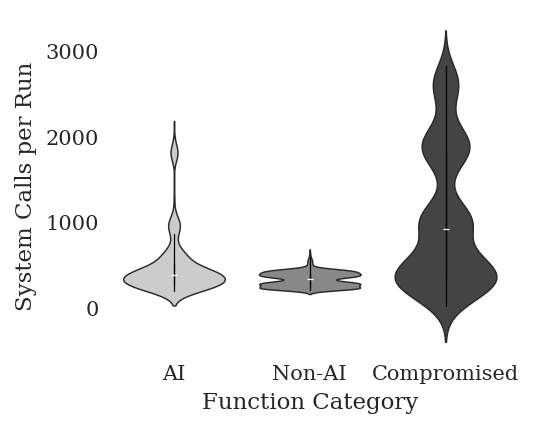

In [48]:
# Prepare plot data
df_plot = pd.concat([
    pd.DataFrame({'Syscalls': vals, 'Category': cat})
    for cat, vals in data.items()
])

# Grayscale palette for academic publications
palette = {'AI': '#CCCCCC', 'Non-AI': '#888888', 'Compromised': '#444444'}
order = ['AI', 'Non-AI', 'Compromised']

# Create figure (single column width ~3.5in, double ~7in)
fig, ax = plt.subplots(figsize=(3.5, 2.8))

sns.violinplot(
    data=df_plot, x='Category', y='Syscalls',
    order=order, hue='Category', hue_order=order, palette=palette,
    inner='box', linewidth=0.7, width=0.75, ax=ax, legend=False
)

# Style inner boxplot
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(0.6)

ax.set_xlabel('Function Category')
ax.set_ylabel('System Calls per Run')
ax.yaxis.grid(True, linestyle='--', alpha=0.4, linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout(pad=0.5)
plt.savefig('figures/syscall_distribution_violin.pdf', bbox_inches='tight')
plt.show()

In [49]:
# Summary statistics
stats = pd.DataFrame({
    'n': [len(v) for v in data.values()],
    'Mean': [np.mean(v) for v in data.values()],
    'Median': [np.median(v) for v in data.values()],
    'Std': [np.std(v) for v in data.values()],
    'Min': [min(v) for v in data.values()],
    'Max': [max(v) for v in data.values()],
}, index=data.keys()).round(1)
stats

,n,Mean,Median,Std,Min,Max
AI,980,485.6,386.0,344.5,203,2017
Non-AI,993,335.9,344.0,83.3,205,646
Compromised,823,1057.4,922.0,802.2,23,2831
